In [1]:
import pandas as pd
import numpy as np
from sklearn.utils import resample

In [2]:
class_0 = 100
class_1 = 900
np.random.seed(123)
df1 = pd.DataFrame({
    "f1":np.random.normal(0,1,class_0),
    "f2":np.random.normal(0,1,class_0),
    "target":[0]*class_0
})

df2 = pd.DataFrame({
    "f1":np.random.normal(0,1,class_1),
    "f2":np.random.normal(0,1,class_1),
    "target":[1]*class_1
})

In [3]:
df1.head()

,f1,f2,target
0,-1.085631,0.642055,0
1,0.997345,-1.977888,0
2,0.282978,0.712265,0
3,-1.506295,2.598304,0
4,-0.578600,-0.024626,0


In [4]:
df2.head()

,f1,f2,target
0,0.703310,-0.644925,1
1,-0.598105,1.575650,1
2,2.200702,0.753276,1
3,0.688297,0.284470,1
4,-0.006307,0.204860,1


In [5]:
df1_2 = pd.concat([df1,df2])

In [6]:
df1_2

,f1,f2,target
0,-1.085631,0.642055,0
1,0.997345,-1.977888,0
2,0.282978,0.712265,0
3,-1.506295,2.598304,0
4,-0.578600,-0.024626,0
...,...,...,...
895,-1.725890,0.845701,1
896,0.611238,-1.119923,1
897,1.309351,-0.359297,1
898,0.695880,-1.609695,1


In [16]:
df1_2.shape

(1000, 3)

In [7]:
df1_2['target'].value_counts()

1    900
0    100
Name: target, dtype: int64

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

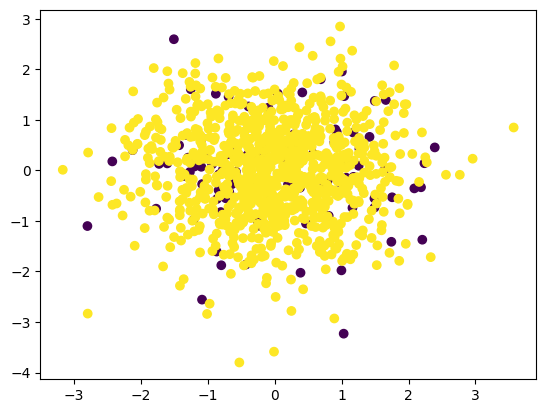

In [23]:
plt.scatter(df1_2.f1,df1_2.f2,c = df1_2.target)

## Upsampling

In [12]:
upsampling_df = resample(df1,replace = True,n_samples = class_1)

In [14]:
upsampling_df.head()

,f1,f2,target
57,1.754886,-0.530675,0
59,1.069393,-0.143176,0
67,-0.233092,-1.095026,0
58,1.495644,1.377257,0
81,-0.688869,1.459589,0


In [15]:
upsampling_df.shape

(900, 3)

In [17]:
df_up = pd.concat([df2,upsampling_df])

In [19]:
df_up.head()

,f1,f2,target
0,0.703310,-0.644925,1
1,-0.598105,1.575650,1
2,2.200702,0.753276,1
3,0.688297,0.284470,1
4,-0.006307,0.204860,1


In [20]:
df_up['target'].value_counts()

1    900
0    900
Name: target, dtype: int64

In [21]:
df_up.shape

(1800, 3)

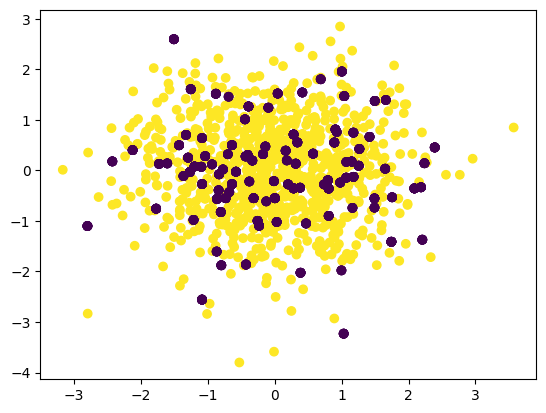

In [24]:
plt.scatter(df_up.f1,df_up.f2,c = df_up.target)

## Down sampling

In [33]:
downsampling_df = resample(df2,replace = False,n_samples = class_0,random_state = 123)

In [34]:
downsampling_df

,f1,f2,target
613,1.629611,0.956296,1
524,-0.383416,-1.802291,1
690,0.161710,0.594040,1
457,-0.158605,-1.156709,1
85,-0.682538,0.729604,1
...,...,...,...
299,-0.142051,0.087212,1
266,0.931530,0.265999,1
727,0.247284,1.382173,1
164,-0.986804,0.823896,1


In [35]:
df_down = pd.concat([df1,downsampling_df])

In [36]:
df_down

,f1,f2,target
0,-1.085631,0.642055,0
1,0.997345,-1.977888,0
2,0.282978,0.712265,0
3,-1.506295,2.598304,0
4,-0.578600,-0.024626,0
...,...,...,...
299,-0.142051,0.087212,1
266,0.931530,0.265999,1
727,0.247284,1.382173,1
164,-0.986804,0.823896,1


In [37]:
df_down.shape

(200, 3)

In [38]:
df_down['target'].value_counts()

0    100
1    100
Name: target, dtype: int64

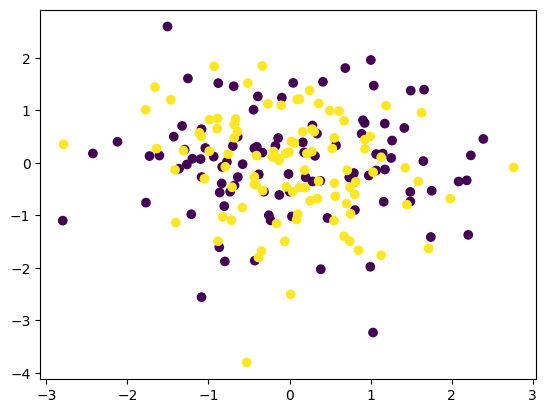

In [39]:
plt.scatter(df_down.f1,df_down.f2,c = df_down.target)